In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
# wczytanie danych
data_start = pd.read_csv("/content/klienci.txt", header=0, encoding='cp1252', index_col="numer")
data_start.head(10)

,wiek,plec,wyksztalcenie,miejsce,kwota,wojewodztwo,wysylka_oferty,zakup
numer,,,,,,,,
1,32,1,srednie,wies,110.810558,dolsl,0,0
2,26,1,wyzsze,m100_500,100.857513,zachpom,0,0
3,20,0,srednie,m100_500,66.199017,zachpom,0,0
4,18,1,policealne,m100_500,77.017056,sl¹s,1,0
5,26,1,srednie,m100_500,137.221167,zachpom,0,0
6,33,0,wyzsze,m0_10,46.609796,dolsl,0,0
7,18,1,srednie,m_500,51.622458,dolsl,0,0
8,20,0,podstawowe,m0_10,28.060977,dolsl,1,1
9,22,0,policealne,m10_100,102.594906,dolsl,0,0


In [ ]:
# 1. if wysylka = 1 & zakup = 1 TAK!
# 2. if wysylka = 1 & zakup 0 NIE WYSYLAMY!
# 3. if wysylka = 0 & zakup = 1 TAK!
# # 4. if wysylka = 0 & zakup = 0 NIE WIEMY
# 4a if wysylka = 1 & zakup = 1 TAK!
# 4b if wysylka = 1 & zakup = 0 NIE WYSYLAMY!

# 1&3&4a = 1
# 2&4b = 0

#1 dataset ze zmienna wysylka_oferty
#2 dataset ze zmienna

In [ ]:
data1a = data_start.loc[(data_start.wysylka_oferty == 1)]
data1b = data_start.loc[(data_start.wysylka_oferty == 0) & (data_start.zakup == 1)]
data = pd.concat([data1a, data1b])

In [ ]:
data.loc[(data.wysylka_oferty == 1)].zakup.sum() / data.wysylka_oferty.sum()

0.36191425722831505

In [ ]:
data.wysylka_oferty.value_counts()

1    2006
0     591
Name: wysylka_oferty, dtype: int64

In [ ]:
data.loc[(data.wysylka_oferty == 0)].zakup.value_counts(normalize=True)
# data.zakup.value_counts()

1    1.0
Name: zakup, dtype: float64

In [ ]:
data2 = data.loc[(data.wysylka_oferty==0)]
data2.zakup.value_counts(normalize=False)

1    591
Name: zakup, dtype: int64

In [ ]:
data3 = data.loc[(data.wysylka_oferty==1)]
data3.zakup.value_counts(normalize=False)

0    1280
1     726
Name: zakup, dtype: int64

In [ ]:
# podstawowe statystyki
data.describe()

,wiek,plec,kwota,wysylka_oferty,zakup
count,2597.000000,2597.000000,2597.000000,2597.000000,2597.000000
mean,42.251444,0.370812,83.784958,0.772430,0.507124
std,15.127282,0.483115,62.371061,0.419344,0.500046
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,41.963055,1.000000,0.000000
50%,42.000000,0.000000,73.450104,1.000000,1.000000
75%,53.000000,1.000000,115.098220,1.000000,1.000000
max,82.000000,1.000000,420.190823,1.000000,1.000000


In [ ]:
# sprawdzenie czy są missingi
data.isna().sum()

wiek              0
plec              0
wyksztalcenie     0
miejsce           0
kwota             0
wojewodztwo       0
wysylka_oferty    0
zakup             0
dtype: int64

In [ ]:
# jakie mamy rodzaje zmiennych
data.dtypes

wiek                int64
plec                int64
wyksztalcenie      object
miejsce            object
kwota             float64
wojewodztwo        object
wysylka_oferty      int64
zakup               int64
dtype: object

In [ ]:
# ile mamy różnych wartości w danych dyskretnych
discrete_data = data.drop(columns=['wiek','kwota'])
for c in discrete_data.columns:
    print("---- %s ---" % c)
    print(data[c].value_counts(normalize=True))

---- plec ---
0    0.629188
1    0.370812
Name: plec, dtype: float64
---- wyksztalcenie ---
srednie       0.395841
wyzsze        0.350789
podstawowe    0.184444
policealne    0.045052
brak          0.023874
Name: wyksztalcenie, dtype: float64
---- miejsce ---
wies        0.250674
m0_10       0.237197
m10_100     0.189064
m100_500    0.166731
m_500       0.156334
Name: miejsce, dtype: float64
---- wojewodztwo ---
dolsl      0.530227
zachpom    0.167886
mazow      0.043897
sl¹s       0.038891
ma³op      0.034270
wielkop    0.024259
³ódz       0.022719
lubel      0.021948
kujpom     0.019253
pomo       0.018868
podkar     0.018483
swiêt      0.013477
lubus      0.013092
opol       0.012322
podlas     0.011552
warmaz     0.008856
Name: wojewodztwo, dtype: float64
---- wysylka_oferty ---
1    0.77243
0    0.22757
Name: wysylka_oferty, dtype: float64
---- zakup ---
1    0.507124
0    0.492876
Name: zakup, dtype: float64


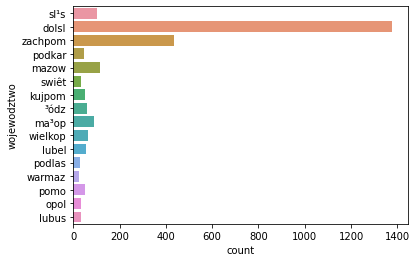

In [ ]:
# ile mamy poszczegolnych wartosci w zmiennej wojewodztwo
sns.countplot(y=data.wojewodztwo)

In [ ]:
# średnio wydana kwota przez osoby, ktore otrzymaly oferte
got_offer = data.loc[(data.wysylka_oferty == 1)]
got_offer.kwota.mean()

81.63698291509571

In [ ]:
# średnio wydana kwota przez osoby, ktore nie otrzymaly oferty
didnt_get_offer = data.loc[(data.wysylka_oferty == 0)]
didnt_get_offer.kwota.mean()

91.07571431574794

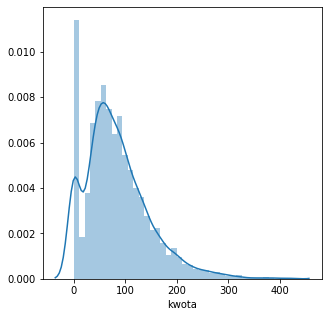

In [ ]:
# Rozkład zmiennej ciągłej - kwota
plt.figure(figsize=(5,5))
sns.distplot(data.kwota)

In [ ]:
# ile osób nic nie kupiło
nothing = sum(data.kwota==0)
procentowo = round(nothing /data.shape[0] *100,2)
print(f"Nie kupiło nic {nothing} osób \n")
print(f"Czyli {procentowo}% wszystkich osób")

Nie kupiło nic 296 osób 

Czyli 11.4% wszystkich osób


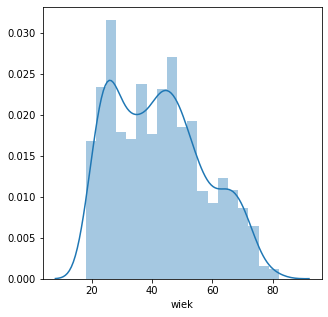

In [ ]:
# Rozkład zmiennej ciągłej - Wiek
plt.figure(figsize=(5,5))
sns.distplot(data.wiek)

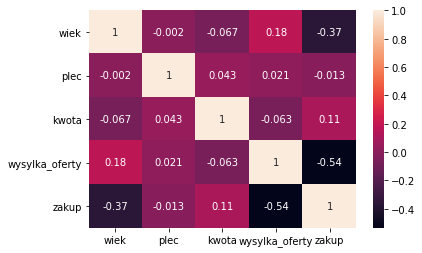

In [ ]:
# Macierz korelacji danych przedstawiona na heatmapie
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)

In [ ]:
# wgrywamy dataset testowy
test = pd.read_csv("/content/klienci_final.txt", header=0, encoding='cp1252')
test = test.set_index("numer")
test.head()

,wiek,plec,wyksztalcenie,miejsce,kwota,wojewodztwo
numer,,,,,,
1,35,0,podstawowe,wies,97.965209,zachpom
2,26,1,podstawowe,wies,38.377882,dolsl
3,31,0,srednie,m10_100,136.401297,dolsl
4,25,0,policealne,m100_500,118.728067,dolsl
5,18,1,srednie,m_500,79.311481,dolsl


In [ ]:
# zamiana zmiennych kategorycznych na liczbowe z użyciem OH Encodera
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
categorical_cols = ['wyksztalcenie', 'miejsce', 'wojewodztwo']
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(data[categorical_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(test[categorical_cols]))

OH_cols_train.index = data.index
OH_cols_valid.index = test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = data.drop(categorical_cols, axis=1)
num_X_valid = test.drop(categorical_cols, axis=1)

# Add one-hot encoded columns to numerical features
data_enc = pd.concat([num_X_train, OH_cols_train], axis=1)
test_enc = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [ ]:
data_enc.head()

,wiek,plec,kwota,wysylka_oferty,zakup,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
numer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,18,1,77.017056,1,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,20,0,28.060977,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,29,0,78.463580,1,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,25,1,114.416752,1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30,29,0,109.744286,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x = data_enc.drop(columns=["wysylka_oferty","zakup"])
y = data_enc['zakup']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# training the model only on training data split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
model = RandomForestClassifier(n_estimators=80, random_state=0)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
metrics.accuracy_score(y_test, predictions)

0.7292307692307692

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
preds = clf.predict(x_test)
metrics.accuracy_score(y_test, preds)

0.6784615384615384

In [ ]:
clf = GradientBoostingClassifier(n_estimators=88,learning_rate=0.18, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.7615384615384615

In [ ]:
import xgboost as xgb

gbm = xgb.XGBClassifier(
    learning_rate = 0.1,
 n_estimators= 4000,
 max_depth= 6,
 min_child_weight= 3,
 #gamma=1,
 gamma=0.5,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train, y_train)
predictions = gbm.predict(x_test)
print(metrics.accuracy_score(y_test, predictions))

0.7184615384615385


In [ ]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from time import time
# Import Support Vector Classifier
# from sklearn.svm import SVC
# svc=SVC(probability=True, kernel='linear')
# gnb = GaussianNB()
logistic = LogisticRegression()
start = time()
ada_clf = AdaBoostClassifier(n_estimators=800, base_estimator=logistic, learning_rate=0.18, random_state=0)
ada_clf.fit(x_train, y_train)
end=time()

ada_y_pred = ada_clf.predict(x_test)
# print(ada_clf.get_params())
print(metrics.accuracy_score(y_test, ada_y_pred))
print(f'training time: {end-start}')

0.7723076923076924
training time: 10.053094387054443


In [ ]:
data2 = data_start.loc[(data_start.wysylka_oferty == 0) & (data_start.zakup == 0)]
data2_pre = data2.drop(columns=['wysylka_oferty','zakup'])
data2_pre.shape 

(7437, 6)

In [ ]:
# data2 encoding
categorical_cols2 = ['wyksztalcenie', 'miejsce', 'wojewodztwo']
OH_cols_train2 = pd.DataFrame(OH_encoder.fit_transform(data2_pre[categorical_cols2]))

OH_cols_train2.index = data2_pre.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train2 = data2_pre.drop(categorical_cols, axis=1)

# Add one-hot encoded columns to numerical features
data2_enc = pd.concat([num_X_train2, OH_cols_train2], axis=1)

In [ ]:
data2_y = ada_clf.predict(data2_enc)
data2_enc['zakup'] = data2_y

In [ ]:
data_enc = data_enc.drop(columns=["wysylka_oferty"])

In [ ]:
data2_enc.zakup.sum()

3418

In [ ]:
data_final = pd.concat([data_enc, data2_enc])

In [ ]:
data_final.zakup.sum()

4735

In [ ]:
X = data_final.drop(columns=["zakup"])
Y = data_final['zakup']

In [ ]:
# training on full data (2 csv files)

model2 = AdaBoostClassifier(n_estimators=800, base_estimator=logistic, learning_rate=0.18, random_state=0)
model2.fit(X,Y)

# finally we can predict our results
predictions2 = model2.predict(test_enc)

output = pd.DataFrame({"x": test_enc.index, "wysylka_oferty": predictions2})
output.to_csv("wysylka_tuned.csv", index=False)